In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### QUESTION 1

In [8]:
def dv(leak_potantial, voltage, memb_resistance, i_e, tau_m):
    return (leak_potential - voltage + memb_resistance * i_e) / tau_m

In [30]:
leak_potential = -70     # E_L
membrane_resistance = 10 # R_m
i_e = 3.1
tau_m = 10 #* ms         # membrane time constant

dv(leak_potential, v_reset, membrane_resistance, i_e, tau_m)

3.1

In [89]:
def euler(args, v_threshold, v_reset, time=1000, step=0.25):
    ''' time(ms), step(ms)'''

    leak_potential  = args['leak_potential']
    memb_resistance = args['memb_resistance']
    i_e             = args['i_e']
    tau_m           = args['tau_m']
    
    volts = []
    time = np.linspace(0, time, int(time / step))
    v = v_reset
    for i in time:
        v = v + step * dv(leak_potential, v, memb_resistance, i_e, tau_m)
        if (v < v_threshold): 
            volts.append(v)
        else:
            volts.append(20)
            v = v_reset

    return x, volts

In [90]:
args = {
    'leak_potential': leak_potential,
    'memb_resistance': membrane_resistance,
    'i_e': i_e,
    'tau_m': tau_m
}
v_reset = -70
v_threshold = -40
time, volts = euler(args, v_threshold, v_reset)

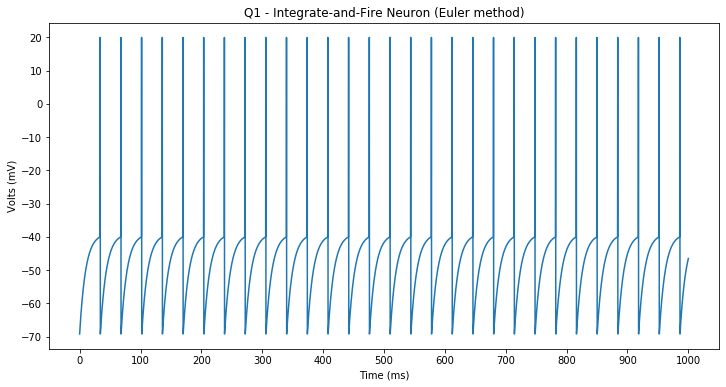

In [93]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_title('Q1 - Integrate-and-Fire Neuron (Euler method)')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Volts (mV)")
ax.plot(time, volts)
ax.set_yticks(range(-70,21,10))
ax.set_xticks(range(0,1001,100))
fig.savefig("plots/q1.png")

#### QUESTION 2